# Problem Statement

Avocado is a fruit consumed by people heavily in the United States. 

Some relevant columns in the dataset:

Date - The date of the observation

AveragePrice - the average price of a single avocado

type - conventional or organic

year - the year

Region - the city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [3]:
fruit = pd.read_csv("avocado.csv")
fruit

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,04-02-2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,28-01-2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,21-01-2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,14-01-2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [4]:
fruit.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
fruit.sample()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
16479,12-03-2017,2.33,14160.84,2593.91,5686.31,15.17,5865.45,5865.45,0.0,0.0,organic,2017,Philadelphia


In [6]:
fruit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


# Data Cleaning

In [8]:
# Date drop
fruit.drop(['Date'], axis = 1, inplace = True)

In [9]:
fruit

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [10]:
fruit.drop(['XLarge Bags'], axis = 1, inplace = True)

In [11]:
fruit

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,conventional,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,conventional,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,conventional,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,conventional,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,organic,2018,WestTexNewMexico
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,organic,2018,WestTexNewMexico
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,organic,2018,WestTexNewMexico
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,organic,2018,WestTexNewMexico


In [14]:
# Label Encoder

le = LabelEncoder()
list1 = ['type', 'region']
for var in list1:
    
    fruit[var] = le.fit_transform(fruit[var].astype(str))

In [15]:
fruit

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,1,2018,53
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,1,2018,53
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,1,2018,53
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,1,2018,53


<AxesSubplot:>

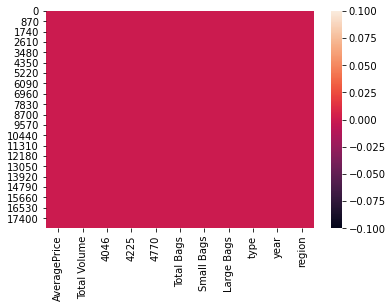

In [16]:
# using Heatmap
sns.heatmap(fruit.isnull())

In [17]:
fruit.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,type,year,region
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,0.499918,2016.147899,26.495644
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,0.500014,0.939938,15.583788
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,0.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,13.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,26.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,1.000000,2017.000000,40.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,1.000000,2018.000000,53.000000


In [18]:
fruit.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
type             0.000329
year             0.215339
region           0.000030
dtype: float64

# EDA

<AxesSubplot:>

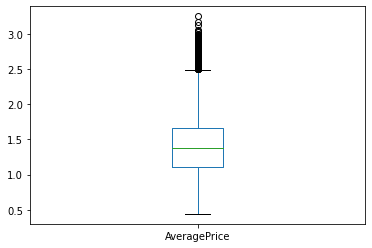

In [19]:
fruit['AveragePrice'].plot.box()

<AxesSubplot:>

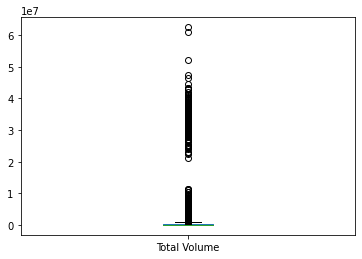

In [21]:
fruit['Total Volume'].plot.box()

<AxesSubplot:>

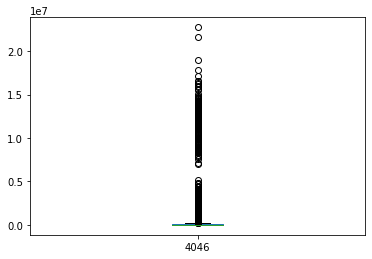

In [22]:
fruit['4046'].plot.box()

<AxesSubplot:>

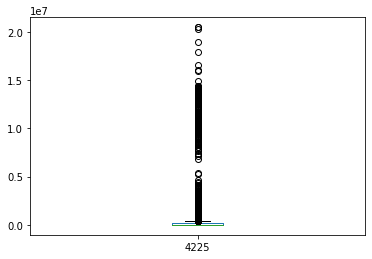

In [23]:
fruit['4225'].plot.box()

<AxesSubplot:>

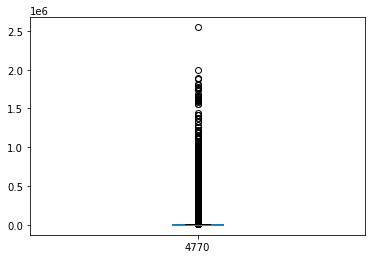

In [25]:
fruit['4770'].plot.box()

<AxesSubplot:>

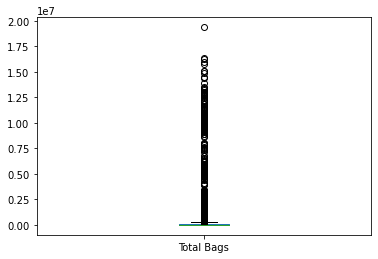

In [26]:
fruit['Total Bags'].plot.box()

<AxesSubplot:>

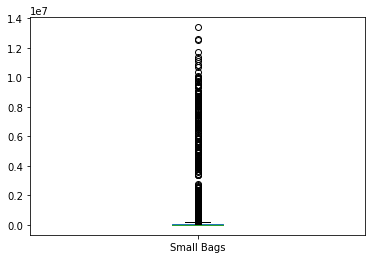

In [27]:
fruit['Small Bags'].plot.box()

<AxesSubplot:>

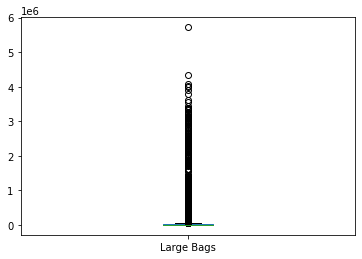

In [28]:
fruit['Large Bags'].plot.box()

<AxesSubplot:>

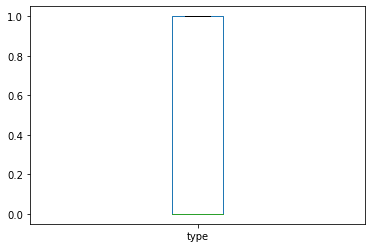

In [30]:
fruit['type'].plot.box()

<AxesSubplot:>

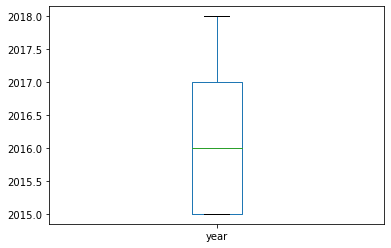

In [32]:
fruit['year'].plot.box()

<AxesSubplot:>

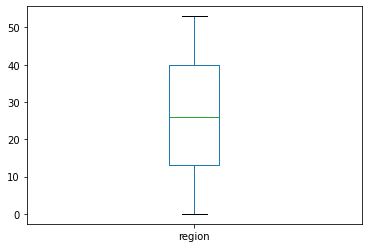

In [33]:
fruit['region'].plot.box()

# Correlation

In [35]:
fruit.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,type,year,region
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,0.615845,0.093197,-0.011716
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,-0.232434,0.017193,0.174176
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,-0.225819,0.003353,0.192073
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,-0.232289,-0.009559,0.145726
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,-0.210027,-0.036531,0.095252
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,-0.217788,0.071552,0.175256
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,-0.220535,0.063915,0.164702
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,-0.193177,0.087891,0.198768
type,0.615845,-0.232434,-0.225819,-0.232289,-0.210027,-0.217788,-0.220535,-0.193177,1.000000,-0.000032,-0.000280
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,-0.000032,1.000000,-0.000055


<AxesSubplot:>

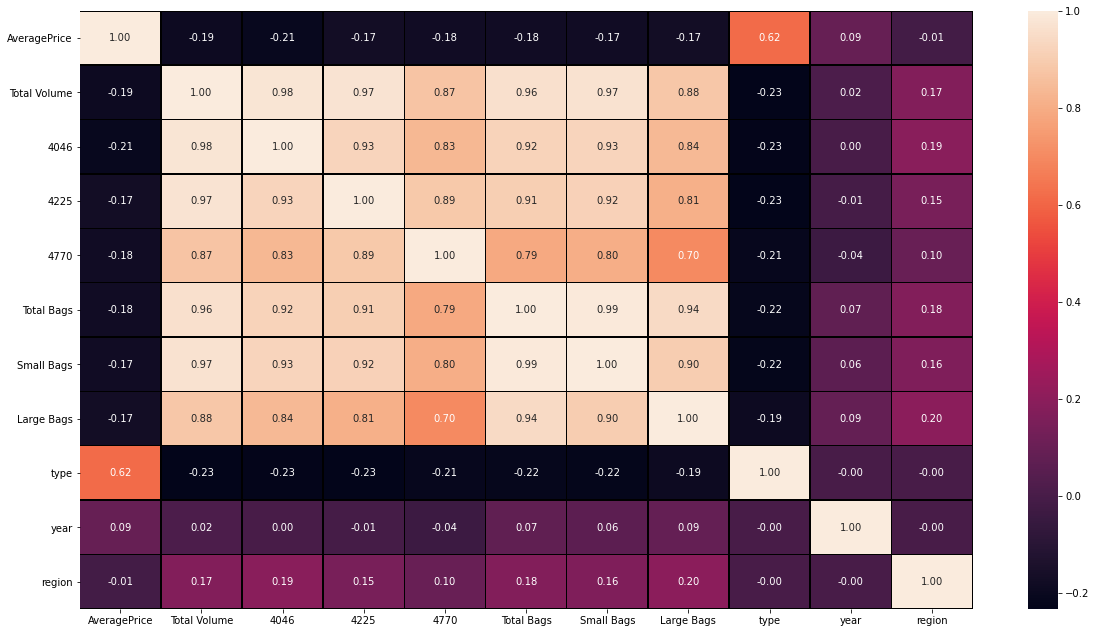

In [39]:
# Correlation using heatmap
plt.figure(figsize=(20,11))
sns.heatmap(fruit.corr(), annot = True, linewidth = .5, linecolor = 'black', fmt = '.2f')

# Normal Distribution Curve

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

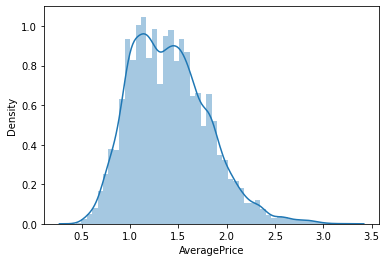

In [41]:
sns.distplot(fruit['AveragePrice'])

<AxesSubplot:xlabel='Total Volume', ylabel='Density'>

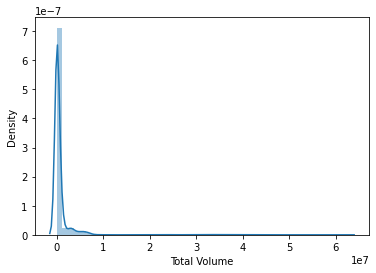

In [42]:
sns.distplot(fruit['Total Volume'])

<AxesSubplot:xlabel='4046', ylabel='Density'>

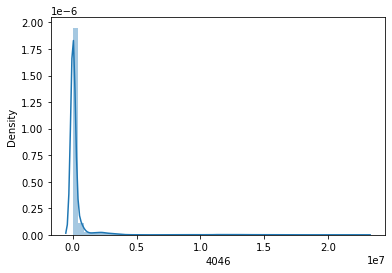

In [43]:
sns.distplot(fruit['4046'])

<AxesSubplot:xlabel='4225', ylabel='Density'>

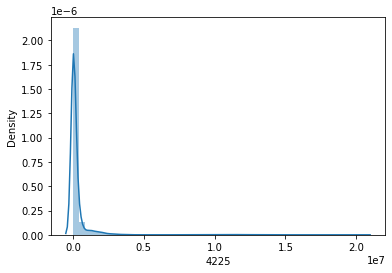

In [44]:
sns.distplot(fruit['4225'])

<AxesSubplot:xlabel='4770', ylabel='Density'>

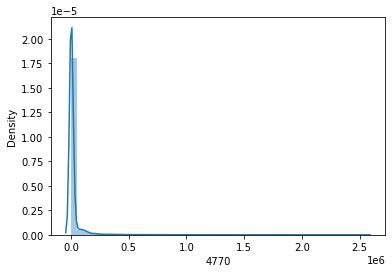

In [45]:
sns.distplot(fruit['4770'])

<AxesSubplot:xlabel='Total Bags', ylabel='Density'>

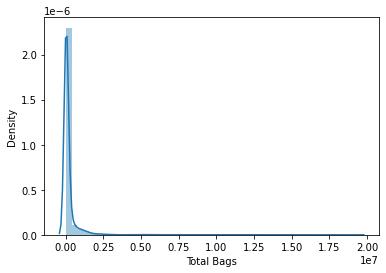

In [46]:
sns.distplot(fruit['Total Bags'])

<AxesSubplot:xlabel='Small Bags', ylabel='Density'>

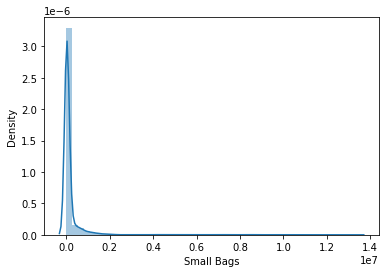

In [47]:
sns.distplot(fruit['Small Bags'])

<AxesSubplot:xlabel='Large Bags', ylabel='Density'>

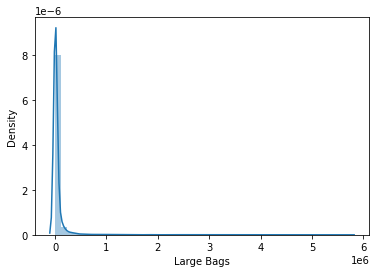

In [48]:
sns.distplot(fruit['Large Bags'])

<AxesSubplot:xlabel='type', ylabel='Density'>

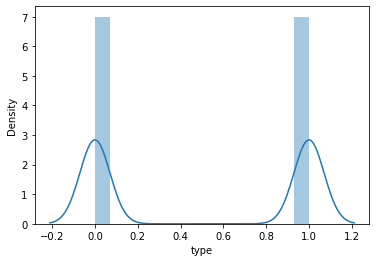

In [49]:
sns.distplot(fruit['type'])

<AxesSubplot:xlabel='year', ylabel='Density'>

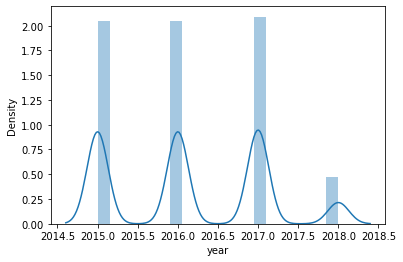

In [50]:
sns.distplot(fruit['year'])

<AxesSubplot:xlabel='region', ylabel='Density'>

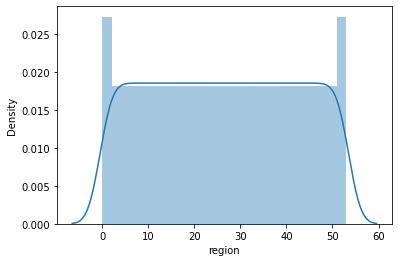

In [51]:
sns.distplot(fruit['region'])

# Outliers

In [53]:
z = np.abs(zscore(fruit))
z

array([[0.18868864, 0.22771641, 0.23081597, ..., 0.99983562, 1.22128204,
        1.7002522 ],
       [0.13901962, 0.23042664, 0.23110251, ..., 0.99983562, 1.22128204,
        1.7002522 ],
       [1.18206895, 0.21208462, 0.23100731, ..., 0.99983562, 1.22128204,
        1.7002522 ],
       ...,
       [1.15237477, 0.24233073, 0.2306933 , ..., 1.00016441, 1.97050371,
        1.70081131],
       [1.30138182, 0.24162464, 0.2304279 , ..., 1.00016441, 1.97050371,
        1.70081131],
       [0.53151208, 0.24125273, 0.22934712, ..., 1.00016441, 1.97050371,
        1.70081131]])

In [54]:
threshold =3
print(np.where(z>3))

(array([  346,   359,   783, ..., 17304, 17402, 17428], dtype=int64), array([2, 2, 4, ..., 0, 0, 0], dtype=int64))


In [55]:
fruit_new = fruit[(z<3).all(axis=1)]
print(fruit.shape)
print(fruit_new.shape)

(18249, 11)
(17736, 11)


# Divide data in Feature & vector

In [63]:
x = fruit_new.drop(['type'], axis =1)
y = fruit_new['type']

# Remove Skewness

In [64]:
x = power_transform(x, method = 'yeo-johnson')
x

array([[-0.11458779, -0.08212475, -0.66134222, ..., -0.78502597,
        -1.2138583 , -2.01130976],
       [-0.06102608, -0.15385747, -0.78062168, ..., -0.77509265,
        -1.2138583 , -2.01130976],
       [-1.29842221,  0.1968502 , -0.73539517, ..., -0.76244456,
        -1.2138583 , -2.01130976],
       ...,
       [ 1.18772877, -0.77864587, -0.62205602, ..., -0.95425668,
         1.9726314 ,  1.57745177],
       [ 1.31655171, -0.70544003, -0.55141537, ..., -0.91965465,
         1.9726314 ,  1.57745177],
       [ 0.61932622, -0.67115773, -0.36498444, ..., -1.05142693,
         1.9726314 ,  1.57745177]])

In [65]:
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[-0.11458779, -0.08212475, -0.66134222, ..., -0.78502597,
        -1.21380764, -2.01130976],
       [-0.06102608, -0.15385747, -0.78062168, ..., -0.77509265,
        -1.21380764, -2.01130976],
       [-1.29842221,  0.1968502 , -0.73539517, ..., -0.76244456,
        -1.21380764, -2.01130976],
       ...,
       [ 1.18772877, -0.77864587, -0.62205602, ..., -0.95425668,
         1.97268206,  1.57745177],
       [ 1.31655171, -0.70544003, -0.55141537, ..., -0.91965465,
         1.97268206,  1.57745177],
       [ 0.61932622, -0.67115773, -0.36498444, ..., -1.05142693,
         1.97268206,  1.57745177]])

# Model

In [66]:
lr = LogisticRegression()
for i in range(0,1000):
    x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = i, test_size = 0.20)
    lr.fit(x_train, y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    
    if round(accuracy_score(y_train, pred_train)*100,1) == round(accuracy_score(y_test, pred_test)*100,1):
        
        print("At random state", i, "The model performs very well")
        print("Random_state:-", i)
        
        print("Training r2_score is:-", accuracy_score(y_train, pred_train)*100)
        
        print("Testing r2_score is:-", accuracy_score(y_test, pred_test)*100)

At random state 36 The model performs very well
Random_state:- 36
Training r2_score is:- 95.15083168875105
Testing r2_score is:- 95.23675310033822
At random state 42 The model performs very well
Random_state:- 42
Training r2_score is:- 95.07330138144911
Testing r2_score is:- 95.09582863585119
At random state 43 The model performs very well
Random_state:- 43
Training r2_score is:- 95.10854243022273
Testing r2_score is:- 95.09582863585119
At random state 48 The model performs very well
Random_state:- 48
Training r2_score is:- 95.13673526924161
Testing r2_score is:- 95.06764374295378
At random state 88 The model performs very well
Random_state:- 88
Training r2_score is:- 95.14378347899634
Testing r2_score is:- 95.06764374295378
At random state 94 The model performs very well
Random_state:- 94
Training r2_score is:- 95.11559063997744
Testing r2_score is:- 95.12401352874859
At random state 106 The model performs very well
Random_state:- 106
Training r2_score is:- 95.10854243022273
Testing r

At random state 582 The model performs very well
Random_state:- 582
Training r2_score is:- 95.0662531716944
Testing r2_score is:- 95.12401352874859
At random state 587 The model performs very well
Random_state:- 587
Training r2_score is:- 95.15083168875105
Testing r2_score is:- 95.20856820744082
At random state 592 The model performs very well
Random_state:- 592
Training r2_score is:- 95.101494220468
Testing r2_score is:- 95.09582863585119
At random state 603 The model performs very well
Random_state:- 603
Training r2_score is:- 95.17197631801523
Testing r2_score is:- 95.15219842164599
At random state 604 The model performs very well
Random_state:- 604
Training r2_score is:- 95.101494220468
Testing r2_score is:- 95.12401352874859
At random state 611 The model performs very well
Random_state:- 611
Training r2_score is:- 95.101494220468
Testing r2_score is:- 95.06764374295378
At random state 614 The model performs very well
Random_state:- 614
Training r2_score is:- 95.12263884973217
Test

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20, random_state = 94)

In [69]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.48      0.49      0.49      1710
           1       0.52      0.51      0.52      1838

    accuracy                           0.50      3548
   macro avg       0.50      0.50      0.50      3548
weighted avg       0.50      0.50      0.50      3548



# Cross Validation Score

In [70]:
pred_lr = lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss = accuracy_score(y_test, pred_lr)
for j in range(2,10):
    lsscore = cross_val_score(lr,x,y,cv=j)
    lsc = lsscore.mean()
    
    print("At cv:-", j)
    print("Cross validation score is:-", lsc*100)
    print("accuracy_score is:-", lss*100)
    print("\n")

At cv:- 2
Cross validation score is:- 92.2530446549391
accuracy_score is:- 95.09582863585119


At cv:- 3
Cross validation score is:- 93.45399188092016
accuracy_score is:- 95.09582863585119


At cv:- 4
Cross validation score is:- 93.97834912043301
accuracy_score is:- 95.09582863585119


At cv:- 5
Cross validation score is:- 94.10782855066874
accuracy_score is:- 95.09582863585119


At cv:- 6
Cross validation score is:- 94.32228236355435
accuracy_score is:- 95.09582863585119


At cv:- 7
Cross validation score is:- 94.51377569827292
accuracy_score is:- 95.09582863585119


At cv:- 8
Cross validation score is:- 94.48579161028417
accuracy_score is:- 95.09582863585119


At cv:- 9
Cross validation score is:- 94.3840452494618
accuracy_score is:- 95.09582863585119




In [71]:
lsscore_selected = cross_val_score(lr,x,y,cv= 7).mean()
print("The cv score is: ", lsscore_selected, "\nThe accuracy score is: ", lss)

The cv score is:  0.9451377569827292 
The accuracy score is:  0.9509582863585119


# Naive Bayes Classification

In [72]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [73]:
predgnb = gnb.predict(x_test)
print(accuracy_score(predgnb, y_test))

0.9162908680947013


In [76]:
print(confusion_matrix(y_test, predgnb))
print(classification_report(y_test, predgnb))

[[1609  101]
 [ 196 1642]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      1710
           1       0.94      0.89      0.92      1838

    accuracy                           0.92      3548
   macro avg       0.92      0.92      0.92      3548
weighted avg       0.92      0.92      0.92      3548



# Support Vector Classification

In [77]:
from sklearn.svm import SVC
svc = SVC(kernel = 'rbf')
svc.fit(x_train, y_train)

SVC()

In [78]:
predsvc = svc.predict(x_test)
print('actual and predicted value score', accuracy_score(y_test, predsvc))

actual and predicted value score 0.991826381059752


In [79]:
from sklearn.svm import SVC
svc = SVC(kernel = 'poly')
svc.fit(x_train, y_train)

SVC(kernel='poly')

In [80]:
predsvc = svc.predict(x_test)
print('actual and predicted value score', accuracy_score(y_test, predsvc))

actual and predicted value score 0.9706877113866967


In [81]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear')
svc.fit(x_train, y_train)

SVC(kernel='linear')

In [82]:
predsvc = svc.predict(x_test)
print('actual and predicted value score', accuracy_score(y_test, predsvc))

actual and predicted value score 0.9534949267192785


# KNN Classifier

In [83]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train)
predknn = knn.predict(x_test)
predknn

array([1, 0, 0, ..., 1, 1, 1])

In [84]:
print(confusion_matrix(y_test, predknn))

[[1710    0]
 [   5 1833]]


In [85]:
print(classification_report(y_test, predknn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1710
           1       1.00      1.00      1.00      1838

    accuracy                           1.00      3548
   macro avg       1.00      1.00      1.00      3548
weighted avg       1.00      1.00      1.00      3548



# Decision Tree Classifier

In [87]:
from sklearn.tree import DecisionTreeClassifier

In [88]:
dct = DecisionTreeClassifier()
dct.fit(x_train, y_train)
preddct = dct.predict(x_test)
preddct

array([1, 0, 0, ..., 0, 1, 1])

In [89]:
print(classification_report(y_test, preddct))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1710
           1       1.00      0.99      0.99      1838

    accuracy                           0.99      3548
   macro avg       0.99      0.99      0.99      3548
weighted avg       0.99      0.99      0.99      3548



Best performing model is Knn classifier , Decision Tree Classifier and SVC.

# AUC- ROC Curve

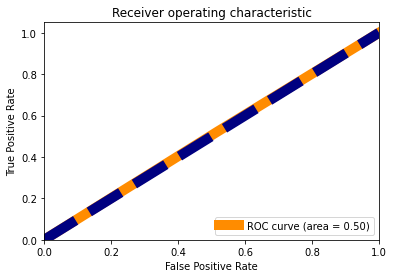

In [90]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(pred_test, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color = 'darkorange', lw = 10, label = 'ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color ='navy',lw=10,linestyle = '--')
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')

plt.legend(loc = "lower right")
plt.show()

# Model Saving:

In [91]:
import pickle
filename = 'avocado_project.pkl'
pickle.dump(lr, open(filename, 'wb'))

# Conclusion:

In [92]:
a = np.array(y_test)
predicted = np.array(lr.predict(x_test))
avocado_com = pd.DataFrame({"original": a, "predicted": predicted}, index = range(len(a)))
avocado_com

,original,predicted
0,1,1
1,0,0
2,0,0
3,1,1
4,1,1
...,...,...
3543,0,0
3544,1,1
3545,1,0
3546,1,1
